In [3]:
from sklearn.datasets import fetch_openml
mnist=fetch_openml('mnist_784',version=1)
mnist.keys()

/Users/willowolabi/Documents/anaconda3/lib/python3.10/site-packages/sklearn/datasets/_openml.py:932: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


dict_keys(['data', 'target', 'frame', 'categories', 'feature_names', 'target_names', 'DESCR', 'details', 'url'])

In [4]:
pip install -- upgrade scikit-learn

ERROR: Could not find a version that satisfies the requirement upgrade (from versions: none)
ERROR: No matching distribution found for upgrade
Note: you may need to restart the kernel to use updated packages.


In [5]:
mnist.keys()

dict_keys(['data', 'target', 'frame', 'categories', 'feature_names', 'target_names', 'DESCR', 'details', 'url'])

In [12]:
X,y = mnist.data ,mnist.target

In [13]:
#70,000 image and each image has 784 feautures 
X.shape

(70000, 784)

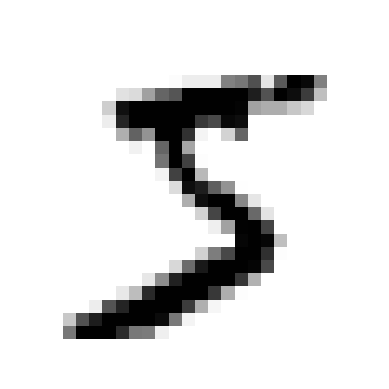

In [18]:
import matplotlib as mpl
import matplotlib.pyplot as plt 

some_digit = X.iloc[0]
some_digit_image = some_digit.to_numpy().reshape(28,28)
plt.imshow(some_digit_image,cmap="binary")
plt.axis("off")
plt.show()

In [19]:
y[0]

'5'

In [21]:
import numpy as np
y=y.astype(np.uint8)

In [23]:
X_train,X_test,y_train,y_test = X[:60000],X[60000:],y[:60000],y[60000:]

In [24]:
# Training a binary classifer 
y_train_5 = (y_train==5)
y_test_5 = (y_test == 5)
from sklearn.linear_model import SGDClassifier 
sgd_clf = SGDClassifier( random_state = 42)
sgd_clf.fit(X_train,y_train_5)
sgd_clf.predict([some_digit])

/Users/willowolabi/Documents/anaconda3/lib/python3.10/site-packages/sklearn/base.py:420: UserWarning: X does not have valid feature names, but SGDClassifier was fitted with feature names
  warnings.warn(


array([ True])

In [26]:
#Performance measure 
from sklearn.model_selection import cross_val_score
cross_val_score(sgd_clf,X_train,y_train_5, cv=3, scoring = "accuracy")

array([0.95035, 0.96035, 0.9604 ])

In [30]:
from sklearn.base import BaseEstimator 
class Never5Classifier(BaseEstimator):
    def fit(self, X, y=None):
        return self
    def predict(self,X):
        return np.zeros((len(X), 1), dtype=bool)
    

In [31]:
never_5_clf = Never5Classifier()
cross_val_score(never_5_clf, X_train,y_train_5,cv=3 , scoring = "accuracy")

array([0.91125, 0.90855, 0.90915])

In [32]:
#Confusion Matrix preferred for classification
from sklearn.model_selection import cross_val_predict 
y_train_pred = cross_val_predict (sgd_clf, X_train,y_train_5, cv=3)


In [33]:
from sklearn.metrics import confusion_matrix 
confusion_matrix ( y_train_5, y_train_pred)

array([[53892,   687],
       [ 1891,  3530]])

In [35]:
#precision of classifier 
from sklearn.metrics import precision_score, recall_score 
precision_score(y_train_5,y_train_pred)

0.8370879772350012

In [36]:
recall_score(y_train_5,y_train_pred)

0.6511713705958311

In [37]:
from sklearn.metrics import f1_score
f1_score(y_train_5,y_train_pred)

0.7325171197343846

In [39]:
y_scores=sgd_clf.decision_function([some_digit])
y_scores

/Users/willowolabi/Documents/anaconda3/lib/python3.10/site-packages/sklearn/base.py:420: UserWarning: X does not have valid feature names, but SGDClassifier was fitted with feature names
  warnings.warn(


array([2164.22030239])

In [40]:
threshold=0
y_some_digit_pred=(y_scores >threshold)


In [42]:
y_some_digit_pred


array([ True])

In [44]:
#multiclass Classification 
from sklearn.svm import SVC
svm_clf = SVC()
svm_clf.fit(X_train,y_train)
svm_clf.predict([some_digit])

/Users/willowolabi/Documents/anaconda3/lib/python3.10/site-packages/sklearn/base.py:420: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


array([5], dtype=uint8)

In [45]:
some_digit_scores = svm_clf.decision_function([some_digit])
some_digit_scores

/Users/willowolabi/Documents/anaconda3/lib/python3.10/site-packages/sklearn/base.py:420: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


array([[ 1.72501977,  2.72809088,  7.2510018 ,  8.3076379 , -0.31087254,
         9.3132482 ,  1.70975103,  2.76765202,  6.23049537,  4.84771048]])

In [46]:
np.argmax(some_digit_scores)

5

In [47]:
svm_clf.classes_

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

In [50]:
#force scikit-learn to use ovo or ovr
from sklearn.multiclass import OneVsRestClassifier
ovr_clf = OneVsRestClassifier
ovr_clf.fit(X_train,y_train)
ovr_clf.predict([some_digit])

TypeError: OneVsRestClassifier.fit() missing 1 required positional argument: 'y'

In [ ]:
#multilabel Classification 

from sklearn.neighbors import kneighborsClassifer 

